# Digital Image Proccessing project

For this Project, I will Enhance some photos by denoising them. I'm not going to use the built-in functions.
I will build a user defined functions for the mentioned functionalites :
- Log transformation
- Contrast Stretching
- Histogram Equalization

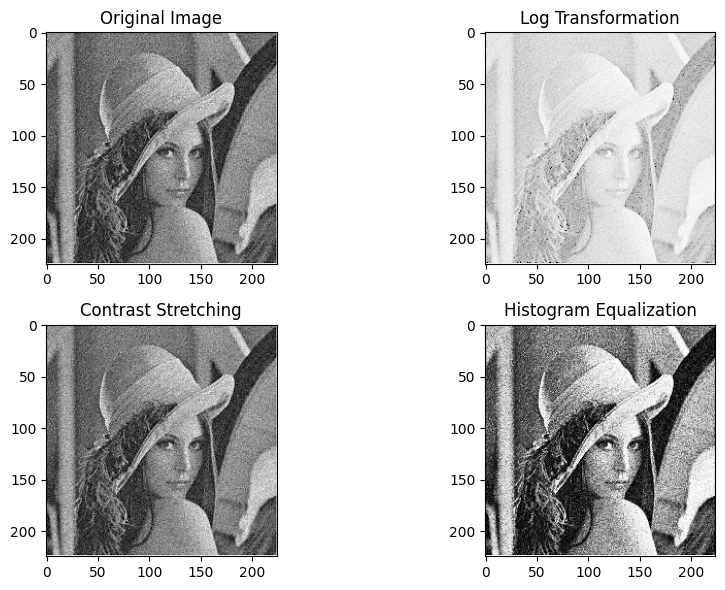

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('download.jpeg', 0)  # Load as grayscale

# Log Transformation
log_image = np.log1p(image)

# Contrast Stretching
stretched_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Display the images
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(log_image, cmap='gray')
plt.title('Log Transformation')

plt.subplot(2, 2, 3)
plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast Stretching')

plt.subplot(2, 2, 4)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')

plt.tight_layout()
plt.show()

# This is the result before and after using the built in functions.
## Now I will try to do the same operation without using them.

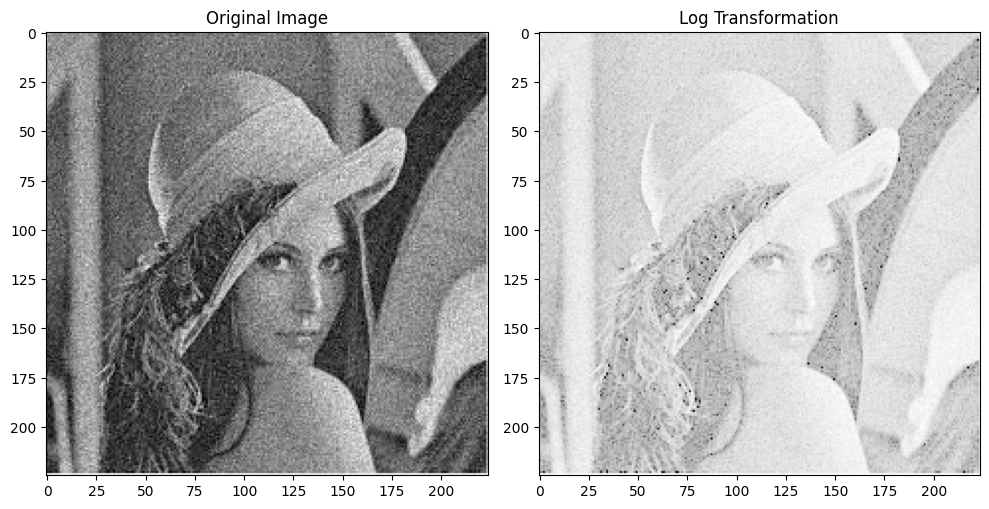

In [3]:
log_image = np.zeros_like(image, dtype=np.float32)
c = 255 / np.log(1 + np.max(image))  # Scaling factor

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        log_image[i, j] = c * np.log(1 + image[i, j])

log_image = np.uint8(log_image)

# Display the images
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(log_image, cmap='gray')
plt.title('Log Transformation')

plt.tight_layout()
plt.show()

### In this code, we manually apply the log transformation to each pixel of the image. First, we create an output image log_image with the same size and data type as the original image, initialized with zeros.

#### We calculate the scaling factor c based on the maximum pixel value in the original image. Then, we iterate over each pixel in the image and compute the log transformation using the formula c * np.log(1 + pixel_value). 
**`Note that we add 1 to the pixel value before taking the logarithm to avoid errors when dealing with values close to zero.`**

#### After applying the transformation, we convert the log_image array to the uint8 data type to ensure it is in the range [0, 255] for proper display.

#### Finally, we display the original image and the log-transformed image using matplotlib.
__________________________


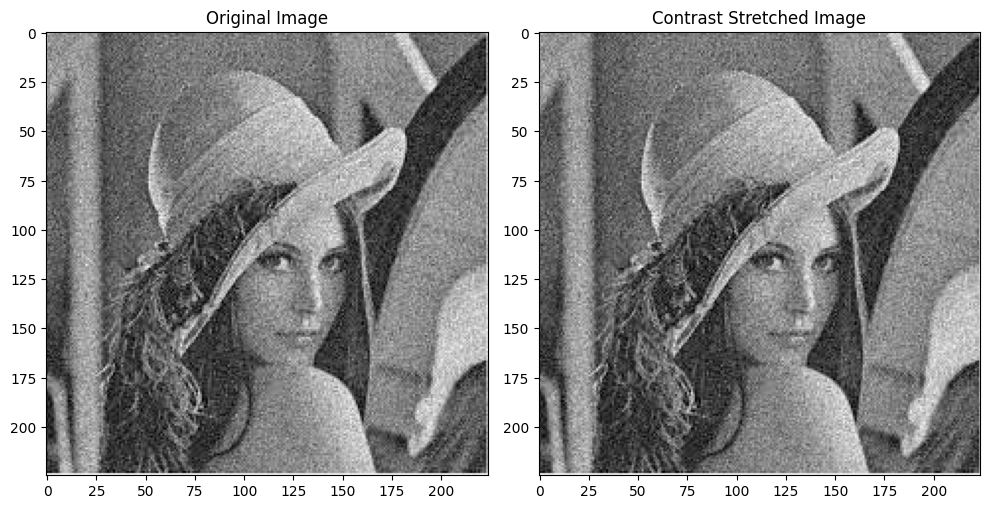

In [4]:
# Contrast Stretching
stretched_image = np.zeros_like(image, dtype=np.uint8)

# Calculate minimum and maximum pixel values
min_val = np.min(image)
max_val = np.max(image)

# Calculate scaling factors
a = 0
b = 255

# Apply contrast stretching
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        stretched_image[i, j] = int((image[i, j] - min_val) * ((b - a) / (max_val - min_val)) + a)

# Display the images
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast Stretched Image')

plt.tight_layout()
plt.show()

## In this code, we manually apply the contrast stretching operation to each pixel of the image. First, we create an output image stretched_image with the same size and data type as the original image, initialized with zeros.

### We calculate the minimum and maximum pixel values in the original image using np.min and np.max functions, respectively. Then, we define the desired output range as a (minimum value) and b (maximum value), typically 0 and 255 for an 8-bit image.

### Next, we iterate over each pixel in the image and apply the contrast stretching formula:

**`stretched_pixel = (pixel_value - min_val) * ((b - a) / (max_val - min_val)) + a`**


#### This formula linearly maps the input range [min_val, max_val] to the desired output range [a, b].

### Finally, we display the original image and the contrast-stretched image using matplotlib.
______________________________


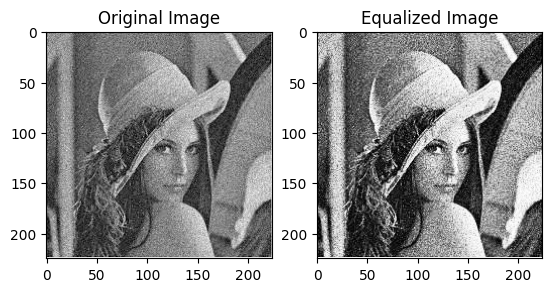

In [5]:
#Calculate the histogram of the image:
hist, bins = np.histogram(image.flatten(), 256, [0,256])

#Calculate the cumulative distribution function (CDF) of the histogram:
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

#Calculate the equalized histogram:
equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)
equalized_image = equalized_image.reshape(image.shape)

#Display the original and equalized images:
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()



________________________


### This implementation calculates the histogram, CDF, and performs the equalization manually without relying on any built-in functions. It demonstrates the underlying process of histogram equalization by accessing the pixel intensities and performing the necessary calculations step by step.



In [6]:
#Calculate the histogram of the image:
histogram = np.zeros(256, dtype=int)  # Initialize an array to store the histogram

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        intensity = int(image[i, j] * 255)  # Scale the intensity to the range [0, 255]
        intensity = max(0, min(255, intensity))  #Limit intensity within [0, 255] range
        histogram[intensity] += 1  # Increment the count for the corresponding intensity


In [7]:
#Calculate the cumulative distribution function (CDF) of the histogram:
cdf = np.zeros(256, dtype=int)  # Initialize an array to store the CDF

cdf[0] = histogram[0]  # Set the first element of the CDF as the count of the first intensity

for i in range(1, 256):
    cdf[i] = cdf[i-1] + histogram[i]  # Calculate the cumulative count for each intensity



In [8]:
#Normalize the CDF:
cdf_normalized = cdf.astype(float) / cdf.max()


In [9]:
#Perform histogram equalization:
equalized_image = np.zeros_like(image)  # Initialize an array to store the equalized image

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        intensity = int(image[i, j] * 255)  # Scale the intensity to the range [0, 255]
        intensity = max(0, min(255, intensity))  # Limit intensity within [0, 255] range
        equalized_intensity = cdf_normalized[intensity]  # Retrieve the equalized intensity
        equalized_image[i, j] = equalized_intensity  # Assign the equalized intensity to the pixel


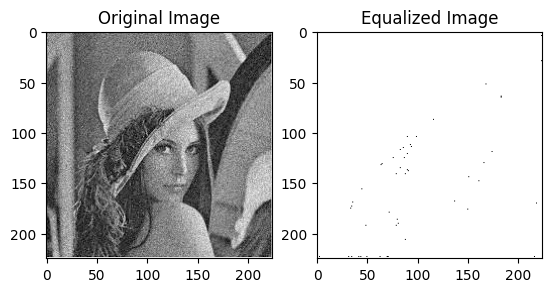

In [10]:
#Display the original and equalized images:
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()
